In [1]:
# data: Mall_ Customers.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# create input
x = df.iloc[:, [3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### dendrograms

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

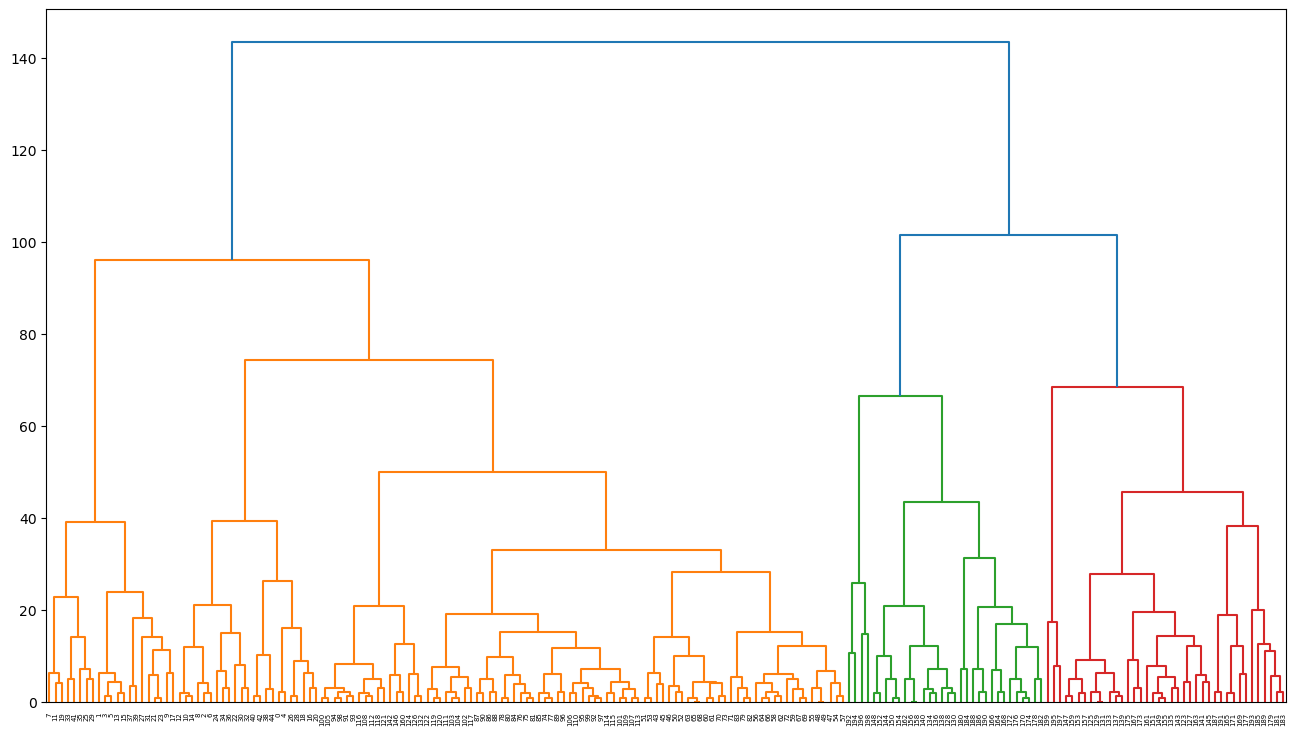

In [12]:
plt.figure(figsize=(16,9))

dendrogram(linkage(x, 'complete'));

In [13]:
# form the clusters

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
ag = AgglomerativeClustering(n_clusters= 5)

In [20]:
labels = ag.fit_predict(x)

In [22]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [24]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

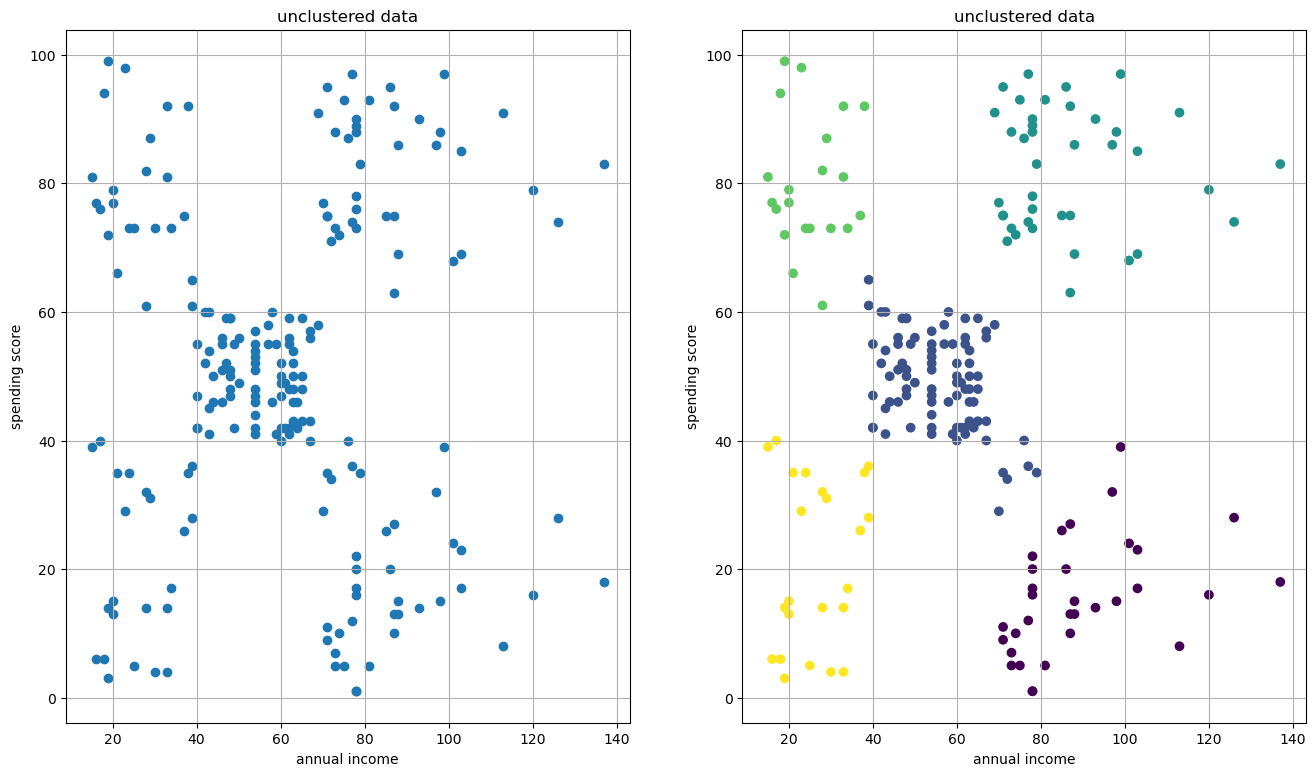

In [26]:
plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
plt.title('unclustered data')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.grid()

plt.subplot(1,2,2)
plt.title('unclustered data')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = labels)
plt.grid()

# Kmeans

In [29]:
from sklearn.cluster import KMeans

In [31]:
sse = []

for k in range(1,16):
    km = KMeans(n_clusters= k)
    km.fit_predict(x)
    sse.append(km.inertia_)

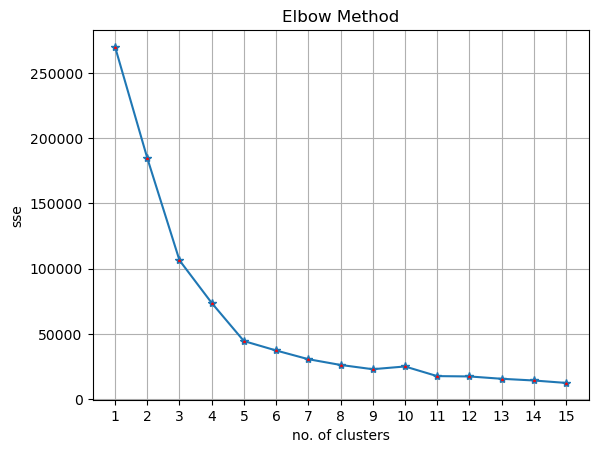

In [33]:
plt.title('Elbow Method')
plt.xlabel('no. of clusters')
plt.ylabel('sse')
plt.xticks(range(1,20,1))
plt.plot(range(1,16), sse, marker = '*', mfc = 'red')
plt.grid();

In [35]:
from kneed import KneeLocator
kl = KneeLocator(range(1,16), sse, curve = 'convex', direction= 'decreasing')
kl.knee

5

In [37]:
km = KMeans(n_clusters= 5)

In [39]:
labels = km.fit_predict(x)

In [41]:
labels

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
6.05
https://mitu.co.in/submit


adityathakare72@gmail.com